In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer
from plot.Trajectory import Trajectory
from plot.Statistics import Statistics

## Simulation setup

#### Parameters

In [2]:
nr_particles = 10**2
nr_steps = 10**5
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
observer_substeps = np.array([False, False, True]) # observe only steps (no substeps)
mfp = [3.75*10**13/4.0, 3.75*10**13/4.0, 7.2*10**13]  # [m]
delta_rho_div_phi = 1 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]; 1pc
all_steps = False

In [ ]:
sim = Simulation()

source = Source(gyro_radius, mfp, source_pos, nr_particles)
sim.add_source(source)

observer = Observer(observer_substeps, all_steps)
sim.add_observer(observer)

%time sim.run_simulation(nr_steps)
sim.save_data('data')

start simulation
source


<string>:3: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'mean_free_path' of function 'Particle.__init__'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "files/Particle.py", line 26:
class Particle():
    def __init__(self, particle_id, gyro_radius, mean_free_path, pos):
    ^

/home/patrick/.local/lib/python3.8/site-packages/numba/core/ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'mean_free_path' of function 'ctor'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<string>", line 2:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=lo

observer


## Analyze statistics


In [ ]:
#from plot.Trajectory import Trajectory

df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
sta = Statistics(df_time_evolution_observer, dimensions)
tra = Trajectory(df_time_evolution_observer, dimensions)
particle_ids = tra.get_particle_ids()

In [ ]:
nr_steps = 3*10**4
tra.plot_trajectory('x', 'y', 'd', particle_ids[0], nr_steps, None)

In [ ]:
bins = 20
file_name = None
sta.plot_distribution('z', -1, bins, file_name)

In [ ]:
df_kappas = sta.plot_diffusion_coefficients()

In [ ]:
df_kappas

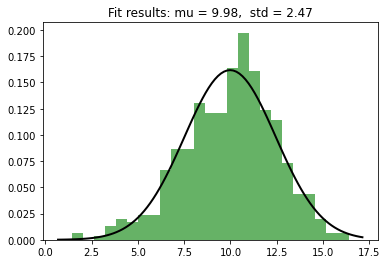

In [139]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()